In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('./train.csv')
testA = pd.read_csv('./testA.csv')

In [3]:
train['sample'] = 'train'

In [4]:
testA['sample'] = 'teat'

In [5]:
data = pd.concat([train, testA], axis=0, ignore_index=True, sort=True)

In [6]:
data.columns

Index(['annualIncome', 'applicationType', 'delinquency_2years', 'dti',
       'earliesCreditLine', 'employmentLength', 'employmentTitle',
       'ficoRangeHigh', 'ficoRangeLow', 'grade', 'homeOwnership', 'id',
       'initialListStatus', 'installment', 'interestRate', 'isDefault',
       'issueDate', 'loanAmnt', 'n0', 'n1', 'n10', 'n11', 'n12', 'n13', 'n14',
       'n2', 'n2.1', 'n2.2', 'n2.3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9',
       'openAcc', 'policyCode', 'postCode', 'pubRec', 'pubRecBankruptcies',
       'purpose', 'regionCode', 'revolBal', 'revolUtil', 'sample', 'subGrade',
       'term', 'title', 'totalAcc', 'verificationStatus'],
      dtype='object')

In [7]:
print(sorted(data['grade'].unique()))
print(sorted(data['subGrade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']
['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(['A','B','C','D','E','F','G'])
data['grade'] = le.transform(data['grade'])

In [9]:
le = LabelEncoder()
le.fit(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'])
data['subGrade'] = le.transform(data['subGrade'])

In [10]:
data['employmentLength'].value_counts(dropna=False).sort_index()

1 year        65671
10+ years    328525
2 years       90565
3 years       80163
4 years       59818
5 years       62645
6 years       46582
7 years       44230
8 years       45168
9 years       37866
< 1 year      80226
NaN           58541
Name: employmentLength, dtype: int64

In [11]:
data['employmentLength'].replace(to_replace='10+ years', value='10 years', inplace=True)
data['employmentLength'].replace('< 1 year', '0 years', inplace=True)

In [12]:
def employmentLength_to_int(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])

In [13]:
data['employmentLength'] = data['employmentLength'].apply(employmentLength_to_int)

In [14]:
data['employmentLength'].value_counts(dropna=False).sort_index()

0.0      80226
1.0      65671
2.0      90565
3.0      80163
4.0      59818
5.0      62645
6.0      46582
7.0      44230
8.0      45168
9.0      37866
10.0    328525
NaN      58541
Name: employmentLength, dtype: int64

In [15]:
data['earliesCreditLine'].sample(5)

600198    May-2008
254370    Dec-1972
427863    May-2004
871611    Apr-2000
831257    Apr-1985
Name: earliesCreditLine, dtype: object

In [16]:
data['earliesCreditLine'] = data['earliesCreditLine'].apply(lambda s: int(s[-4:]))

In [17]:
data['earliesCreditLine'].describe()

count    1000000.000000
mean        1998.688632
std            7.606231
min         1944.000000
25%         1995.000000
50%         2000.000000
75%         2004.000000
max         2015.000000
Name: earliesCreditLine, dtype: float64

In [18]:
data.head()

,annualIncome,applicationType,delinquency_2years,dti,earliesCreditLine,employmentLength,employmentTitle,ficoRangeHigh,ficoRangeLow,grade,...,purpose,regionCode,revolBal,revolUtil,sample,subGrade,term,title,totalAcc,verificationStatus
0,110000.0,0,0.0,17.05,2001,2.0,320.0,734.0,730.0,4,...,1,32,24178.0,48.9,train,21,5,1.0,27.0,2
1,46000.0,0,0.0,27.83,2002,5.0,219843.0,704.0,700.0,3,...,0,18,15096.0,38.9,train,16,5,1723.0,18.0,2
2,74000.0,0,0.0,22.77,2006,8.0,31698.0,679.0,675.0,3,...,0,14,4606.0,51.8,train,17,5,0.0,27.0,2
3,118000.0,0,0.0,17.21,1999,10.0,46854.0,689.0,685.0,0,...,4,11,9948.0,52.6,train,3,3,4.0,28.0,1
4,29000.0,0,0.0,32.16,1977,NaN,54.0,694.0,690.0,2,...,10,21,2942.0,32.0,train,11,3,11.0,27.0,2


In [19]:
cate_features = ['grade', 'subGrade', 'employmentTitle', 'homeOwnership', 'verificationStatus', 'purpose', 'postCode', 'regionCode', \
                 'applicationType', 'initialListStatus', 'title', 'policyCode']
for f in cate_features:
    print(f, '类型数：', data[f].nunique())

grade 类型数： 7
subGrade 类型数： 35
employmentTitle 类型数： 298101
homeOwnership 类型数： 6
verificationStatus 类型数： 3
purpose 类型数： 14
postCode 类型数： 935
regionCode 类型数： 51
applicationType 类型数： 2
initialListStatus 类型数： 2
title 类型数： 47903
policyCode 类型数： 1


In [20]:
for f in ['employmentTitle', 'postCode', 'title']:
    data[f+'_cnts'] = data.groupby([f])['id'].transform('count')
    data[f+'_rank'] = data.groupby([f])['id'].rank(ascending=False).astype(int)
    del data[f]

In [21]:
data['title_cnts'].nunique()

214

In [22]:
data['title_rank'].nunique()

491400

In [23]:
data['title_rank'].describe()

count    1000000.000000
mean      141216.572941
std       147776.742143
min            1.000000
25%        10627.000000
50%        88393.500000
75%       241400.250000
max       491400.000000
Name: title_rank, dtype: float64

In [24]:
from sklearn.model_selection import KFold
X_train = data.loc[data['sample']=='train', :].drop(['id','issueDate','isDefault', 'sample'], axis=1)
X_test = data.loc[data['sample']=='test', :].drop(['id','issueDate','isDefault', 'sample'], axis=1)
y_train = data.loc[data['sample']=='train', 'isDefault']

folds = 5
seed = 2020
kf = KFold(n_splits=folds, shuffle=True, random_state=seed)

In [25]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [26]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2)
train_matrix = lgb.Dataset(X_train_split, label=y_train_split)
valid_matrix = lgb.Dataset(X_val, label=y_val)

In [27]:
params = {
            'boosting_type': 'gbdt',
            'objective': 'binary',
            'learning_rate': 0.1,
            'metric': 'auc',
            'min_child_weight': 1e-3,
            'num_leaves': 31,
            'max_depth': -1,
            'reg_lambda': 0,
            'reg_alpha': 0,
            'feature_fraction': 1,
            'bagging_fraction': 1,
            'bagging_freq': 0,
            'seed': 2020,
            'nthread': 8,
            'silent': True,
            'verbose': -1,
}

In [28]:
model = lgb.train(params, train_set=train_matrix, valid_sets=valid_matrix, num_boost_round=20000, verbose_eval=1000, early_stopping_rounds=200)

/anaconda2/envs/myvenv/lib/python3.8/site-packages/lightgbm/basic.py:1075: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  warnings.warn('{0} keyword has been found in `params` and will be ignored.\n'


[LightGBM] [Warning] Unknown parameter: silent
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[473]	valid_0's auc: 0.729584


未调参前lightgbm单模型在验证集上的AUC：0.7295837011206461


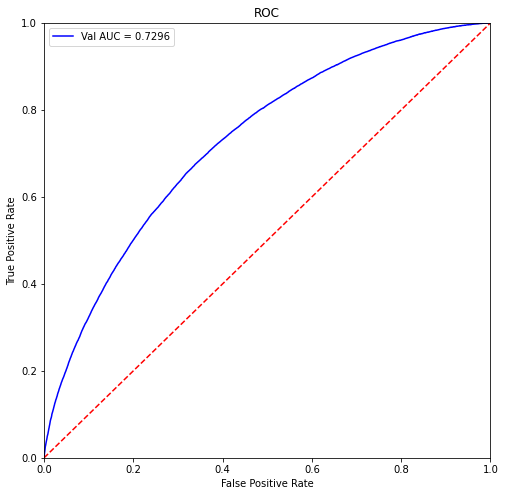

In [29]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
val_pre_lgb = model.predict(X_val, num_iteration=model.best_iteration)
fpr, tpr, threshold = metrics.roc_curve(y_val, val_pre_lgb)
roc_auc = metrics.auc(fpr, tpr)
print('未调参前lightgbm单模型在验证集上的AUC：{}'.format(roc_auc))
"""画出roc曲线图"""
plt.figure(figsize=(8, 8))
plt.title('Validation ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.4f' % roc_auc)
plt.ylim(0,1)
plt.xlim(0,1)
plt.legend(loc='best')
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 画出对角线
plt.plot([0,1],[0,1],'r--')
plt.show()

In [30]:
cv_scores = []
for i, (train_index, valid_index) in enumerate(kf.split(X_train, y_train)):
    print('************************************ {} ************************************'.format(str(i+1)))
    X_train_split, y_train_split, X_val, y_val = X_train.iloc[train_index], y_train[train_index], X_train.iloc[valid_index], y_train[valid_index]
    
    train_matrix = lgb.Dataset(X_train_split, label=y_train_split)
    valid_matrix = lgb.Dataset(X_val, label=y_val)

    params = {
                'boosting_type': 'gbdt',
                'objective': 'binary',
                'learning_rate': 0.1,
                'metric': 'auc',
        
                'min_child_weight': 1e-3,
                'num_leaves': 31,
                'max_depth': -1,
                'reg_lambda': 0,
                'reg_alpha': 0,
                'feature_fraction': 1,
                'bagging_fraction': 1,
                'bagging_freq': 0,
                'seed': 2020,
                'nthread': 8,
                'silent': True,
                'verbose': -1,
    }
    
    model = lgb.train(params, train_set=train_matrix, num_boost_round=20000, valid_sets=valid_matrix, verbose_eval=1000, early_stopping_rounds=200)
    val_pred = model.predict(X_val, num_iteration=model.best_iteration)
    
    cv_scores.append(roc_auc_score(y_val, val_pred))
    print(cv_scores)

print("lgb_scotrainre_list:{}".format(cv_scores))
print("lgb_score_mean:{}".format(np.mean(cv_scores)))
print("lgb_score_std:{}".format(np.std(cv_scores)))

************************************ 1 ************************************


/anaconda2/envs/myvenv/lib/python3.8/site-packages/lightgbm/basic.py:1075: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  warnings.warn('{0} keyword has been found in `params` and will be ignored.\n'


[LightGBM] [Warning] Unknown parameter: silent
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[629]	valid_0's auc: 0.730046
[0.730045718520939]
************************************ 2 ************************************


/anaconda2/envs/myvenv/lib/python3.8/site-packages/lightgbm/basic.py:1075: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  warnings.warn('{0} keyword has been found in `params` and will be ignored.\n'


[LightGBM] [Warning] Unknown parameter: silent
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[598]	valid_0's auc: 0.726627
[0.730045718520939, 0.7266274716562005]
************************************ 3 ************************************


/anaconda2/envs/myvenv/lib/python3.8/site-packages/lightgbm/basic.py:1075: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  warnings.warn('{0} keyword has been found in `params` and will be ignored.\n'


[LightGBM] [Warning] Unknown parameter: silent
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[497]	valid_0's auc: 0.730402
[0.730045718520939, 0.7266274716562005, 0.730402224029222]
************************************ 4 ************************************


/anaconda2/envs/myvenv/lib/python3.8/site-packages/lightgbm/basic.py:1075: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  warnings.warn('{0} keyword has been found in `params` and will be ignored.\n'


[LightGBM] [Warning] Unknown parameter: silent
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[489]	valid_0's auc: 0.729437
[0.730045718520939, 0.7266274716562005, 0.730402224029222, 0.7294369552223219]
************************************ 5 ************************************


/anaconda2/envs/myvenv/lib/python3.8/site-packages/lightgbm/basic.py:1075: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  warnings.warn('{0} keyword has been found in `params` and will be ignored.\n'


[LightGBM] [Warning] Unknown parameter: silent
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[694]	valid_0's auc: 0.72849
[0.730045718520939, 0.7266274716562005, 0.730402224029222, 0.7294369552223219, 0.7284896105110207]
lgb_scotrainre_list:[0.730045718520939, 0.7266274716562005, 0.730402224029222, 0.7294369552223219, 0.7284896105110207]
lgb_score_mean:0.7290003959879408
lgb_score_std:0.0013520411760029535


In [31]:
from sklearn.model_selection import GridSearchCV

def get_best_cv_params(learning_rate=0.1, n_estimators=581, num_leaves=31, max_depth=-1, bagging_fraction=1.0, 
                       feature_fraction=1.0, bagging_freq=0, min_data_in_leaf=20, min_child_weight=0.001, 
                       min_split_gain=0, reg_lambda=0, reg_alpha=0, param_grid=None):
    # 设置5折交叉验证
    cv_fold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True, )
    
    model_lgb = lgb.LGBMClassifier(learning_rate=learning_rate,
                                   n_estimators=n_estimators,
                                   num_leaves=num_leaves,
                                   max_depth=max_depth,
                                   bagging_fraction=bagging_fraction,
                                   feature_fraction=feature_fraction,
                                   bagging_freq=bagging_freq,
                                   min_data_in_leaf=min_data_in_leaf,
                                   min_child_weight=min_child_weight,
                                   min_split_gain=min_split_gain,
                                   reg_lambda=reg_lambda,
                                   reg_alpha=reg_alpha,
                                   n_jobs= 8
                                  )
    grid_search = GridSearchCV(estimator=model_lgb, 
                               cv=cv_fold,
                               param_grid=param_grid,
                               scoring='roc_auc'
                              )
    grid_search.fit(X_train, y_train)

    print('模型当前最优参数为:{}'.format(grid_search.best_params_))
    print('模型当前最优得分为:{}'.format(grid_search.best_score_))